In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
# 데이터 불러오기
df = pd.read_csv('diabetes_dataset.csv')

# Filter for Asian data
asian_df = df[df['ethnicity'] == 'Asian']
non_asian_df = df[df['ethnicity'] != 'Asian']

# diabetes_stage → 0~4로 세분화
mapping = {
    'No Diabetes': 0,
    'Pre-Diabetes': 1,
    'Type 1': 2,
    'Type 2': 3,
    'Gestational': 4
}
df['diabetes_stage_class'] = df['diabetes_stage'].map(mapping)

# 필요한 컬럼만 선택
cols = [
    'smoking_status',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'age',
    'gender',
    'bmi',
    'diabetes_stage_class'
]

# X, y 분리
X = df.drop('diabetes_stage_class', axis=1)
y = df['diabetes_stage_class']

# 문자형 변수 자동 인코딩
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 훈련 세트 & 테스트 세트 구분
train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

In [34]:
# 모델의 특성 조합 구성 및 데이터 변환
# 1 고정 특성은 필요없음 >> include_bias=False
poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(80000, 46)


In [35]:
# 특성 46개 확인
poly.get_feature_names_out()

# 테스트 특성 수정
test_poly = poly.transform(test_input)

In [36]:
# 모델 훈련 및 훈련 세트 z score 확인
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 z score 확인
print(lr.score(test_poly, test_target)) 

1.0
1.0


In [37]:
# ridge 모델로 규제
ridge = Ridge()
ridge.fit(train_scaled, train_target)
# 훈련 z score
print(ridge.score(train_scaled, train_target))
# 테스트 z score
print(ridge.score(test_scaled, test_target))

0.9999999100037358
0.9999999025114826


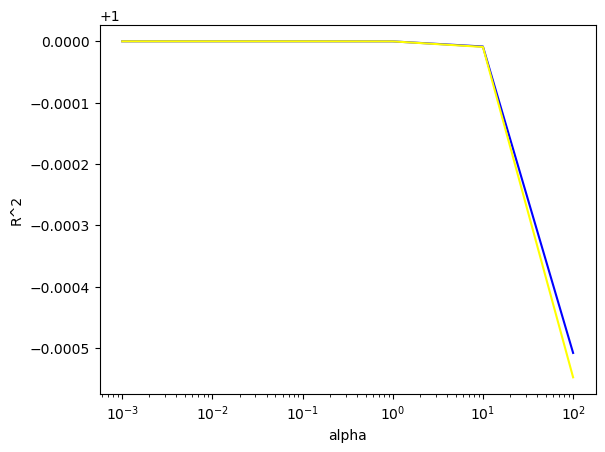

In [47]:
# 적절한 규제값을 알기 위한 R2 그래프 확인

# 규제를 변경할 때마다 z score 저장할 리스트
train_score = []
test_score = []

# 규제값(0.001 >*10> 100)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 학습
    ridge.fit(train_scaled, train_target)
    # 훈련 점수, 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

# 그래프
plt.plot(alpha_list, train_score, color='blue')
plt.plot(alpha_list, test_score, color='yellow')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 규제값 1로 모델 훈련 진행
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9999915420962494
0.9999908423138869
